# Perform discrete activation decoding
Decode ROIs from [Rubin et al. (2016)](http://www.biorxiv.org/content/early/2016/06/18/059618).

In [1]:
%matplotlib inline
from os.path import join

import nibabel as nib
from nilearn import plotting
from nltools.mask import create_sphere

from gclda.model import Model
from gclda.decode import Decoder
from gclda.utils import get_resource_path

/Users/tsalo/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# Load example model and initialize decoder
model = Model.load(join(get_resource_path(), 'models',
                        'Neurosynth2015Filtered2',
                        'model_200topics_2015Filtered2.pkl'))
decoder = Decoder(model)

model.display_model_summary()

# Create mask image
mask_data = (model.dataset.masker.volume.get_data()!=0).astype(int)
affine = model.dataset.masker.volume.affine
mask = nib.Nifti1Image(mask_data, affine)

--- Model Summary ---
 Current State:
	 Current Iteration   = 1000
	 Initialization Seed = 1
	 Current Log-Likely  = -10981413.4523
 Model Hyper-Parameters:
	 Symmetric = 0.1
	 n_topics  = 200
	 n_regions = 2
	 alpha     = 0.010
	 beta      = 0.010
	 gamma     = 1.000
	 delta     = 25.000
	 roi_size  = 1.000
	 dobs      = 50
 Model Training-Data Information:
	 Dataset Label                 = 2015Filtered2
	 Word-Tokens (n_word_tokens)   = 520492
	 Peak-Tokens (n_peak_tokens)   = 400801
	 Word-Types (n_word_labels)    = 6755
	 Documents (n_docs)            = 11362
	 Peak-Dimensions (n_peak_dims) = 3


## Temporoparietal seed

/Users/tsalo/anaconda/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


                  Weight
Term                    
mentalizing     0.042328
intention       0.024556
attribution     0.023771
mental_states   0.022851
mind            0.021668
intentions      0.016640
identification  0.016219
cues            0.015764
intentional     0.014799
mental_state    0.014109


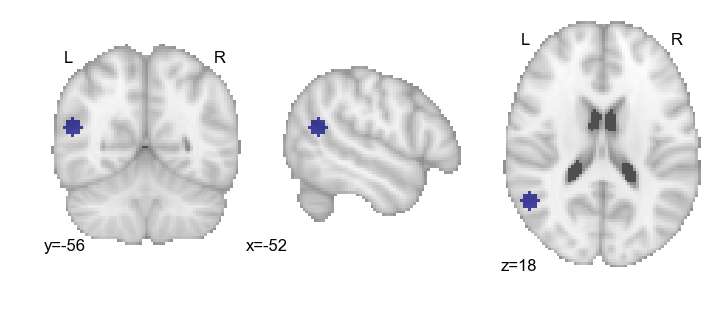

In [3]:
coords = [[-52, -56, 18]]
radii = [6] * len(coords)

roi_img = create_sphere(coords, radius=radii, mask=mask)
fig = plotting.plot_roi(roi_img, display_mode='ortho',
                        cut_coords=[-52, -56, 18],
                        draw_cross=False)

df, _ = decoder.decode_roi(roi_img)
df = df.sort_values(by='Weight', ascending=False)
print(df.head(10))

## Temporoparietal, medial parietal, and dorsomedial prefrontal seeds

               Weight
Term                 
emotional    0.052343
perceived    0.013357
emotions     0.012531
mentalizing  0.011670
emotion      0.011500
accurate     0.011382
help         0.011005
cues         0.009998
gaze         0.008631
optimized    0.007197


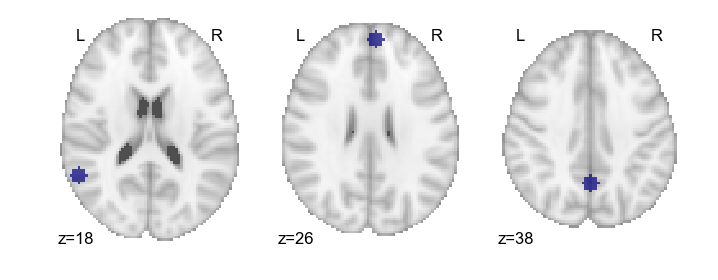

In [4]:
coords = [[-56, -52, 18],
          [0, -58, 38],
          [4, 54, 26]]
radii = [6] * len(coords)

roi_img = create_sphere(coords, radius=radii, mask=mask)
fig = plotting.plot_roi(roi_img, display_mode='z',
                        cut_coords=[18, 26, 38],
                        draw_cross=False)

df, _ = decoder.decode_roi(roi_img)
df = df.sort_values(by='Weight', ascending=False)
print(df.head(10))

## Temporoparietal, left superior temporal sulcus, and left inferior frontal gyrus seeds

               Weight
Term                 
knowledge    0.019503
words        0.011841
mentalizing  0.011682
cues         0.011023
language     0.010904
emotion      0.010877
sentences    0.010633
recognition  0.010333
world        0.009935
gaze         0.009651


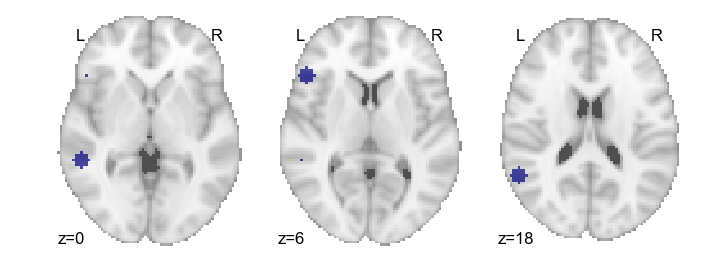

In [5]:
coords = [[-56, -52, 18],
          [-54, -40, 0],
          [-50, 26, 6]]
radii = [6] * len(coords)

roi_img = create_sphere(coords, radius=radii, mask=mask)
fig = plotting.plot_roi(roi_img, display_mode='z',
                        cut_coords=[0, 6, 18],
                        draw_cross=False)

df, _ = decoder.decode_roi(roi_img)
df = df.sort_values(by='Weight', ascending=False)
print(df.head(10))